<a href="https://colab.research.google.com/github/sijuswamy/Test/blob/main/Recommender_Movielense_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie recommendation system

**Objective:** In this implementation, when the user searches for a movie we will recommend the top 10 similar movies using our movie recommendation system. We will be using an item-based collaborative filtering algorithm for our purpose. 

## Step 1: Loading libraries

In [7]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix #for creating compressed sparse row matrix
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Loading Data

In [8]:
## loading data from Github repo
url1='https://raw.githubusercontent.com/sijuswamy/Python-for-Datascience/main/movies.csv'
url2='https://raw.githubusercontent.com/sijuswamy/Python-for-Datascience/main/ratings.csv'
movies = pd.read_csv(url1)
ratings = pd.read_csv(url2)

In [ ]:
## loading data from Google Drive
#movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies.csv")
#ratings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ratings.csv")

In [3]:
#movies.shape
ratings.shape

(100836, 4)

In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

## Some useful Visualizations

In [4]:
data = pd.merge(left=movies, right=ratings, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [5]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

## Exploring Movie Publish Years

In [6]:
years = []

for title in data['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)
        
data['moviePubYear'] = years
print(len(data[data['moviePubYear'] == 9999]))


30


In [7]:
data.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp',
       'moviePubYear'],
      dtype='object')

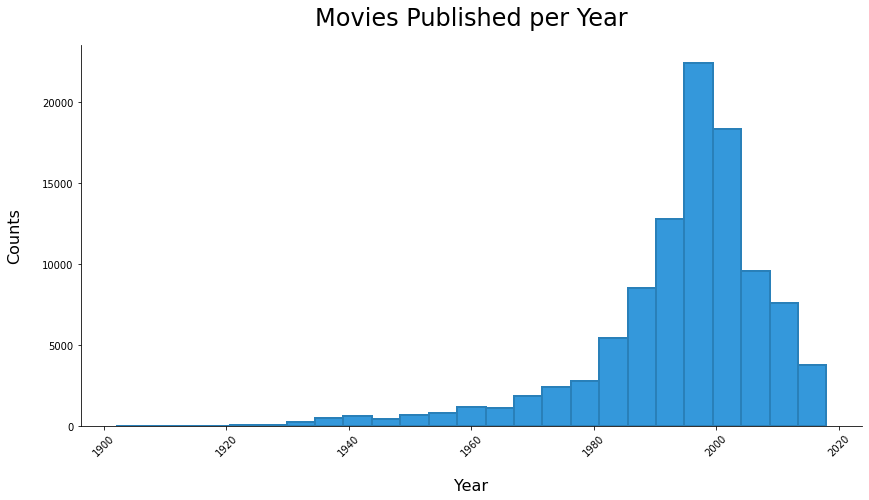

In [9]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if attribute == 'moviePubYear':
        dataset = dataset[dataset['moviePubYear'] != 9999]
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(data, 'moviePubYear', title='Movies Published per Year', xlab='Year', ylab='Counts')


### Movie genre exploration

In [10]:
genre_df = pd.DataFrame(data['genres'].str.split('|').tolist(), index=data['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre']

In [11]:
genre_df.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


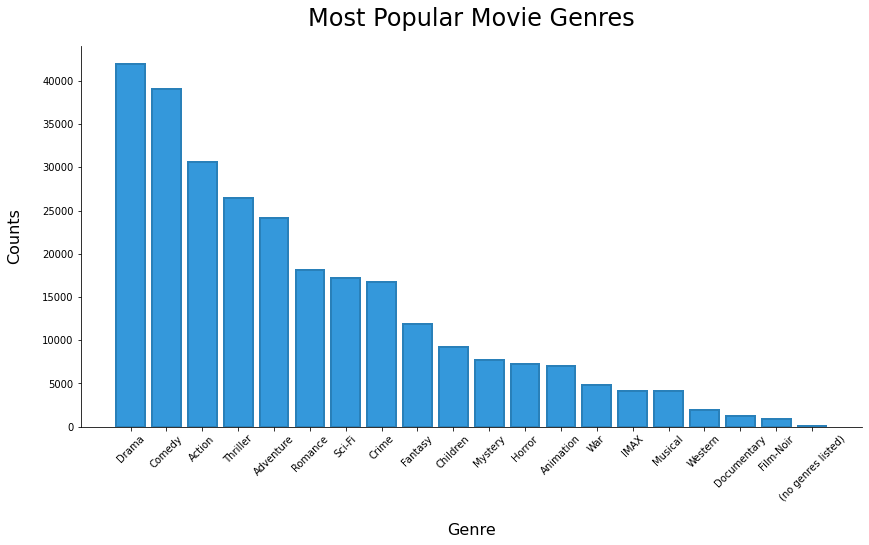

In [ ]:
def make_bar_chart(dataset, attribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[attribute].value_counts().index
        ys = dataset[attribute].value_counts().values
    else:
        xs = dataset[attribute].value_counts().sort_index().index
        ys = dataset[attribute].value_counts().sort_index().values
        
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=45)
    
    
make_bar_chart(genre_df, 'Genre', title='Most Popular Movie Genres', xlab='Genre', ylab='Counts')

## Calculating Ratings by Genre

In [12]:
from collections import defaultdict
values = defaultdict(list)
for ind, row in data.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['rating'])
        
        
genre_lst, rating_lst = [], []
for key, item in values.items():
    if key not in [0, 1]:
        genre_lst.append(key)
        rating_lst.append(np.mean(item))
        
        
genres_with_ratings = pd.DataFrame([genre_lst, rating_lst]).T
genres_with_ratings.columns = ['Genre', 'Mean_Rating']

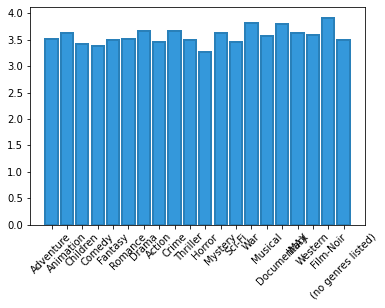

In [13]:
plt.bar(x=genre_lst, height=rating_lst, color='#3498db', edgecolor='#2980b9', linewidth=2)
plt.xticks(rotation=45)
plt.show()

## Come back to the Recommendation System

## Observing the DataFrame
Now that we have added the data, let’s have a look at the files using the `dataframe.head()` command to print the first 5 rows of the dataset.

Let’s have a look at the movies dataset :

In [14]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Interpretation of Rating DataFrame

Ratings dataset has-

>userId – unique for each user.

>movieId – using this feature, we take the title of the movie from the movies dataset.

>rating – Ratings given by each user to all the movies using this we are going to predict the top 10 similar movies.

Here, we can see that userId 1 has watched movieId 1 & 3 and rated both of them 4.0 but has not rated movieId 2 at all. This interpretation is harder to extract from this dataframe. Therefore, to make things easier to understand and work with, we are going to make a new dataframe where each column would represent each unique userId and each row represents each unique movieId.

In [9]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,4.5,3.5,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,2.5,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.5,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.0,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


## Filling `NAN`s

Let’s fix this and impute `NaN` with 0 to make things understandable for the algorithm and also making the data more eye-soothing.

In [10]:
final_dataset.fillna(0,inplace=True)
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.5,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Removing Noise from the data
In the real-world, ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users. We wouldn’t want movies that were rated by a small number of users because it’s not credible enough. Similarly, users who have rated only a handful of movies should also not be taken into account.

So with all that taken into account and some trial and error experimentations,  we will reduce the noise by adding some filters for the final dataset.

* To qualify a movie, a minimum of 10 users should have voted a movie.
* To qualify a user, a minimum of 50 movies should have voted by the user.

In [11]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [17]:
no_user_voted.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [12]:
no_movies_voted.head()

userId
1    232
2     29
3     39
4    216
5     44
Name: rating, dtype: int64

## Visualization of Voting Status

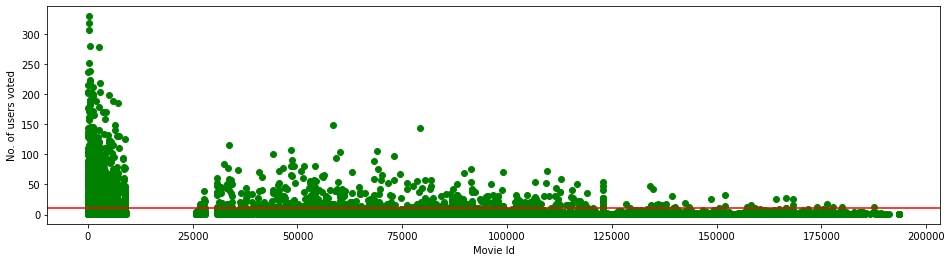

In [27]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='g')
plt.axhline(y=10,color='r')
plt.xlabel('Movie Id')
plt.ylabel('No. of users voted')
plt.show()

## Updating dataset with Valid rating

Making the necessary modifications as per the threshold set.

In [13]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

## Visualizing user rating  data

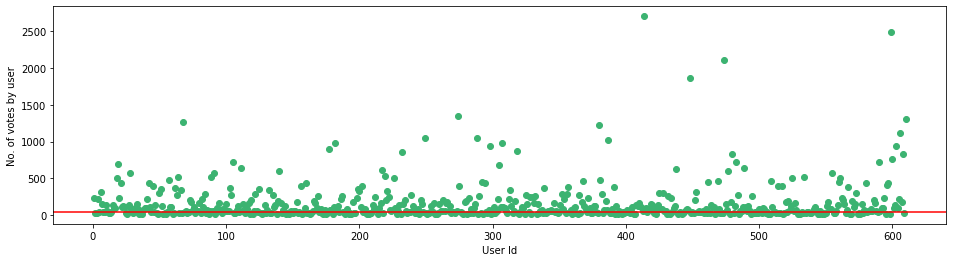

In [29]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('User Id')
plt.ylabel('No. of votes by user')
plt.show()

In [14]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,19,20,21,22,23,24,27,28,29,32,33,34,36,38,39,40,41,42,43,45,47,50,51,52,57,58,59,62,63,64,...,559,560,561,562,563,564,566,567,570,571,572,573,577,579,580,582,583,584,585,586,587,588,590,591,592,593,594,596,597,599,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,4.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,4.0,...,5.0,3.0,4.0,4.5,0.0,0.0,0.0,3.5,4.0,0.0,4.0,5.0,0.0,4.0,3.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.0,0.0,4.0,0.0,2.5,0.0,4.0,0.0,3.5,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.5,0.0,4.0,0.0,4.0,0.0,0.0,2.5,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,3.5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.5,0.0,4.5,...,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.5,0.0,3.0,0.0,0.0,0.0,3.0,4.5,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Designing a Recommender from the scratch

Now, we will calculate the similarity. We can use the pairwise_distance function from sklearn to calculate the cosine similarity.

In [31]:
from sklearn.metrics.pairwise import pairwise_distances 
movie_similarity = pairwise_distances(final_dataset, metric='cosine')
user_similarity = pairwise_distances(final_dataset.T, metric='cosine')

This gives us the item-item and user-user similarity in an array form. The next step is to make predictions based on these similarities. Let’s define a function to do just that.

In [33]:
def predict(ratings, similarity, type='user'):
    if type == 'movie':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'user':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

## Predictions 

Finally, we will make predictions based on user similarity and item similarity.

In [34]:
movie_prediction = predict(final_dataset, movie_similarity, type='movie')
user_prediction = predict(final_dataset, user_similarity, type='user')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
movie_prediction

array([[1.85599634, 1.76688788, 1.84286586, ..., 1.74314846, 2.48337058,
        2.73585405],
       [1.02419524, 0.92932096, 0.96266881, ..., 0.90233338, 1.64214756,
        1.89403898],
       [0.44079814, 0.35292614, 0.37539168, ..., 0.33508676, 1.08786029,
        1.4131566 ],
       ...,
       [0.20486391, 0.07084859, 0.1499872 , ..., 0.07114685, 0.86580464,
        1.06197615],
       [0.20687059, 0.07846444, 0.16488865, ..., 0.07422285, 0.86493182,
        1.02409566],
       [0.22629554, 0.10073593, 0.18503006, ..., 0.09270855, 0.8815148 ,
        1.02856013]])

## Recommended movie for User 1 in comparison with most similar user

In [ ]:
# user Id can be found using this code
#final_dataset.columns[0]
# similarity measure of first user can be listed using this code
#user_similarity[0,:]

In [35]:
user_prediction.shape

(2121, 378)

In [37]:
user_prediction[0]

movieId
1         1.695487
2         0.894354
3         0.336578
5         0.262241
6         0.870411
            ...   
174055    0.104141
176371    0.154463
177765    0.100202
179819    0.089859
187593    0.109058
Name: 0, Length: 2121, dtype: float64

In [36]:
U1_best=np.argmax(user_prediction[0])
data[data['userId']==U1_best]

,movieId,title,genres,userId,rating,timestamp,moviePubYear
60,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,169,4.5,1059427918,1995
242,2,Jumanji (1995),Adventure|Children|Fantasy,169,4.0,1078284713,1995
343,3,Grumpier Old Men (1995),Comedy|Romance,169,5.0,1078284750,1995
400,5,Father of the Bride Part II (1995),Comedy,169,5.0,1078284788,1995
553,7,Sabrina (1995),Comedy|Romance,169,4.5,1078284741,1995
...,...,...,...,...,...,...,...
76294,8529,"Terminal, The (2004)",Comedy|Drama|Romance,169,4.0,1092373247,2004
76611,8641,Anchorman: The Legend of Ron Burgundy (2004),Comedy,169,5.0,1092373285,2004
76674,8644,"I, Robot (2004)",Action|Adventure|Sci-Fi|Thriller,169,2.5,1092373271,2004
76754,8665,"Bourne Supremacy, The (2004)",Action|Crime|Thriller,169,3.5,1092373252,2004


## A movie Recommended to various users based on rating similarity of movies in the past

In [38]:
M1_best=np.argmax(movie_prediction[0])
t=data[data['movieId']==M1_best]
t.userId.unique()

array([  6,  12,  15,  19,  40,  43,  68,  99, 109, 117, 124, 132, 136,
       177, 240, 284, 288, 307, 321, 353, 373, 380, 381, 395, 411, 428,
       429, 446, 483, 489, 520, 566, 584, 599, 600])

In [40]:
t.title

6789    Junior (1994)
6790    Junior (1994)
6791    Junior (1994)
6792    Junior (1994)
6793    Junior (1994)
6794    Junior (1994)
6795    Junior (1994)
6796    Junior (1994)
6797    Junior (1994)
6798    Junior (1994)
6799    Junior (1994)
6800    Junior (1994)
6801    Junior (1994)
6802    Junior (1994)
6803    Junior (1994)
6804    Junior (1994)
6805    Junior (1994)
6806    Junior (1994)
6807    Junior (1994)
6808    Junior (1994)
6809    Junior (1994)
6810    Junior (1994)
6811    Junior (1994)
6812    Junior (1994)
6813    Junior (1994)
6814    Junior (1994)
6815    Junior (1994)
6816    Junior (1994)
6817    Junior (1994)
6818    Junior (1994)
6819    Junior (1994)
6820    Junior (1994)
6821    Junior (1994)
6822    Junior (1994)
6823    Junior (1994)
Name: title, dtype: object

In [39]:
t.title.unique()

array(['Junior (1994)'], dtype=object)

## Creating a recommender using `turicreate` library

After installing turicreate, first let’s import it and read the train and test dataset in our environment. Since we will be using turicreate, we will need to convert the dataset in `SFrames`.

In [41]:
!pip install turicreate

     |████████████████████████████████| 92.0 MB 6.2 kB/s 
     |████████████████████████████████| 322 kB 50.9 MB/s 
     |████████████████████████████████| 3.5 MB 50.2 MB/s 
     |████████████████████████████████| 3.6 MB 52.5 MB/s 
     |████████████████████████████████| 86.4 MB 58 kB/s 
     |████████████████████████████████| 18.3 MB 1.3 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 20.1 MB 11.8 MB/s 
     |████████████████████████████████| 3.8 MB 35.8 MB/s 
     |████████████████████████████████| 449 kB 58.3 MB/s 
     |████████████████████████████████| 2.9 MB 40.6 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=82ef4ab3e95007f0f331652d07d832b0ce303c54ba9d64875d493f4ea7199cc8
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=e741104d0

In [1]:
import pandas as pd
## loading data from Github repo
url1='https://raw.githubusercontent.com/sijuswamy/Python-for-Datascience/main/movies.csv'
url2='https://raw.githubusercontent.com/sijuswamy/Python-for-Datascience/main/ratings.csv'
movies = pd.read_csv(url1)
ratings = pd.read_csv(url2)

In [2]:
import turicreate
train_data = turicreate.SFrame(ratings)

We have user behavior as well as attributes of the users and movies, so we can make content based as well as collaborative filtering algorithms. We will start with a simple popularity model and then build a collaborative filtering model.

First we’ll build a model which will recommend movies based on the most popular choices, i.e., a model where all the users receive the same recommendation(s). We will use the turicreate recommender function popularity_recommender for this.




In [3]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='userId', item_id='movieId', target='rating')

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 100836 observations with 610 users and 9724 items.

Data prepared in: 0.234681s

100836 observations to process; with 9724 unique items.

Various arguments which we have used are:

**train_data:** the SFrame which contains the required training data

**user_id:** the column name which represents each user ID

**item_id:** the column name which represents each item to be recommended (movie_id)

**target:** the column name representing scores/ratings given by the user

Now let's predict the rating. We will recommend the top 5 items for the first 5 users in our dataset.

In [4]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+--------+---------+-------+------+
| userId | movieId | score | rank |
+--------+---------+-------+------+
|   1    |   1151  |  5.0  |  1   |
|   1    |   3851  |  5.0  |  2   |
|   1    |   6835  |  5.0  |  3   |
|   1    |   5746  |  5.0  |  4   |
|   1    |  131724 |  5.0  |  5   |
|   2    |   1631  |  5.0  |  1   |
|   2    |   1151  |  5.0  |  2   |
|   2    |   3851  |  5.0  |  3   |
|   2    |   6835  |  5.0  |  4   |
|   2    |   5746  |  5.0  |  5   |
|   3    |   2075  |  5.0  |  1   |
|   3    |   1631  |  5.0  |  2   |
|   3    |   1151  |  5.0  |  3   |
|   3    |   3851  |  5.0  |  4   |
|   3    |  131724 |  5.0  |  5   |
|   4    |   1631  |  5.0  |  1   |
|   4    |   1151  |  5.0  |  2   |
|   4    |   6835  |  5.0  |  3   |
|   4    |   5746  |  5.0  |  4   |
|   4    |  131724 |  5.0  |  5   |
|   5    |   1151  |  5.0  |  1   |
|   5    |   3851  |  5.0  |  2   |
|   5    |   6835  |  5.0  |  3   |
|   5    |   5746  |  5.0  |  4   |
|   5    |  131724 |  5.0  |

## Building a collaborative filter model with cosine similarity measure

After building a popularity model, we will now build a collaborative filtering model. Let’s train the item similarity model and make top 5 recommendations for the first 5 users.

In [5]:
#Training the model
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='userId', item_id='movieId', target='rating', similarity_type='cosine')

#Making recommendations
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)

Warning: Ignoring columns timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 100836 observations with 610 users and 9724 items.

Data prepared in: 0.108041s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 13.84ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 267.417ms                           | 0                | 8               |

| 2.26s                               | 100              | 9724            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 3.31309s

+--------+---------+---------------------+------+
| userId | movieId |        score        | rank |
+--------+---------+---------------------+------+
|   1    |   2918  |  0.7889324804318363 |  1   |
|   1    |   1527  |  0.5533062116853122 |  2   |
|   1    |   1036  |  0.5492549494936548 |  3   |
|   1    |   2762  |  0.5405481072335407 |  4   |
|   1    |   1200  |  0.5229049142578552 |  5   |
|   2    |  80463  |  0.8201397246327894 |  1   |
|   2    |  73017  |  0.8130379771364147 |  2   |
|   2    |   7153  |  0.7753027102042889 |  3   |
|   2    |  69122  |  0.7640126676395022 |  4   |
|   2    |  33794  |  0.7527617853263329 |  5   |
|   3    |   2985  |  0.3113639308856084 |  1   |
|   3    |   1129  |  0.3098627420572134 |  2   |
|   3    |   1214  |  0.2895376605865283 |  3   |
|   3    |   2641  | 0.28641602931878507 |  4   |
|   3    |   2000  |  0.286158208663647  |  5   |
|   4    |   2918  | 0.48238556059422316 |  1   |
|   4    |   1089  | 0.43379688759644824 |  2   |


Here we can see that the recommendations (movie_id) are different for each user. So personalization exists, i.e. for different users we have a different set of recommendations.

In this model, we do not have the ratings for each movie given by each user. We must find a way to predict all these missing ratings. For that, we have to find a set of features which can define how a user rates the movies. These are called latent features. We need to find a way to extract the most important latent features from the the existing features.

## Low cost Method with KNN- algorithm
In this section we will discuss a computationally low cost model by applying k-nn algorithm from `sklearn' library on a revised final_data matrix.

## Removing sparsity

Our final_dataset has dimensions of 2121 * 378 where most of the values are sparse. We are using only a small dataset but for the original large dataset of movie lens which has more than 100000 features, our system may run out of computational resources when that is feed to the model. To reduce the sparsity we use the `csr_matrix` function from the `scipy` library.


In [15]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [16]:
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


## Calculating Cosine similarity in `Python`

In [ ]:
from numpy import dot
from numpy.linalg import norm

#define arrays
a = [23, 34, 44, 45, 42, 27, 33, 34]
b = [17, 18, 22, 26, 26, 29, 31, 30]

#calculate Cosine Similarity
cos_sim = dot(a, b)/(norm(a)*norm(b))

cos_sim

0.965195008357566

## Making the movie recommendation system model

We will be using the `KNN` algorithm to compute similarity with `cosine` distance metric which is very fast and more preferable than `pearson` coefficient.

In [18]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)#other metric are 'l1','l2','minkowski',''euclidean' etc
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
#movie_list

NameError: ignored

## Making the recommendation function
The working principle is very simple. We first check if the movie name input is in the database and if it is we use our recommendation system to find similar movies and sort them based on their similarity distance and output only the top 10 movies with their distances from the input movie.

In [19]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        #print(rec_movie_indices)
        return df
    else:
        return "No movies found. Please check your input"

In [20]:
# showing movie ID with similarity
movie_name='Up'
n_movies_to_reccomend = 10
movie_list = movies[movies['title'].str.contains(movie_name)]
movie_idx= movie_list.iloc[0]['movieId']
knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)

(array([[3.33066907e-16, 3.86424863e-01, 4.15362864e-01, 4.48120665e-01,
         4.57703565e-01, 4.82481453e-01, 4.85650015e-01, 4.92615353e-01,
         4.97269401e-01, 5.09639686e-01, 5.11766841e-01]]),
 array([[ 83, 206,  82,  31,  69,  72,  98, 202,  79,   7, 175]]))

In [21]:
#testing
movie_name='Up'
len(movies[movies['title'].str.contains(movie_name)])

61

## Finally, Let’s Recommend some movies!

In [22]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


In [23]:
get_movie_recommendation('Jumanji')

,Title,Distance
1,Casper (1995),0.474253
2,Stargate (1994),0.469654
3,"Nightmare Before Christmas, The (1993)",0.462612
4,Home Alone (1990),0.443432
5,Beauty and the Beast (1991),0.435007
6,Aladdin (1992),0.425428
7,Jurassic Park (1993),0.420563
8,Mrs. Doubtfire (1993),0.416164
9,"Mask, The (1994)",0.413743
10,"Lion King, The (1994)",0.377013
